In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


import sys

sys.path.append('../')

from eda import utils

large = pd.read_csv('large.csv')

In [4]:
large.columns

Index(['('chroma_cens', 'kurtosis', '01')',
       '('chroma_cens', 'kurtosis', '02')',
       '('chroma_cens', 'kurtosis', '03')',
       '('chroma_cens', 'kurtosis', '04')',
       '('chroma_cens', 'kurtosis', '05')',
       '('chroma_cens', 'kurtosis', '06')',
       '('chroma_cens', 'kurtosis', '07')',
       '('chroma_cens', 'kurtosis', '08')',
       '('chroma_cens', 'kurtosis', '09')',
       '('chroma_cens', 'kurtosis', '10')',
       ...
       '('tonnetz', 'std', '05')', '('tonnetz', 'std', '06')',
       '('zcr', 'kurtosis', '01')', '('zcr', 'max', '01')',
       '('zcr', 'mean', '01')', '('zcr', 'median', '01')',
       '('zcr', 'min', '01')', '('zcr', 'skew', '01')', '('zcr', 'std', '01')',
       '('track', 'genre_top')'],
      dtype='object', length=519)

In [8]:
X = large.loc[:,"('chroma_cens', 'kurtosis', '01')":"('zcr', 'std', '01')"]
y = large.loc[:,"('track', 'genre_top')"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [12]:
from sklearn.svm import SVC

rbf_svm = SVC(C=10, gamma='scale', kernel='rbf')
y_pred = rbf_svm.fit(X=X_train, y=y_train).predict(X_test)

              precision    recall  f1-score   support

  Electronic       0.50      0.35      0.42       409
     Hip-Hop       0.53      0.67      0.59       425
Instrumental       0.57      0.61      0.59       433
         Pop       0.33      0.23      0.27       394
        Rock       0.56      0.68      0.61       418

    accuracy                           0.51      2079
   macro avg       0.50      0.51      0.50      2079
weighted avg       0.50      0.51      0.50      2079



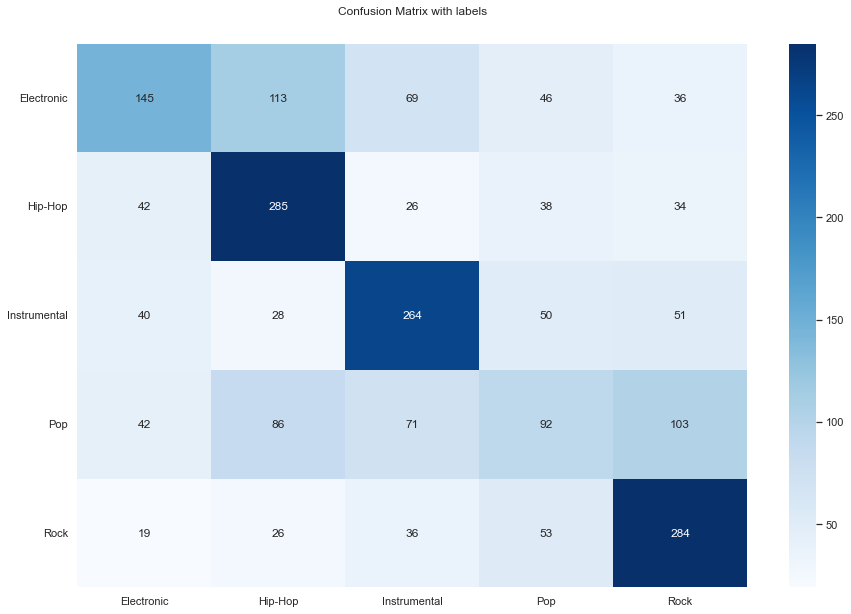

In [14]:
print(classification_report(y_test, y_pred))
cf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(15,10)})

ax = sns.heatmap(cf_mat, annot=True, cmap='Blues', fmt='g')
ax.set_xticklabels(rbf_svm.classes_)
kwargs = {'rotation': 'horizontal'}
ax.set_yticklabels(rbf_svm.classes_, **kwargs)

ax.set_title('Confusion Matrix with labels\n\n')

## Display the visualization of the Confusion Matrix.
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100, 1000],  
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': ['rbf', 'linear', 'sigmoid'],
    }


grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train, y_train)

print(grid.best_params_)